<a href="https://colab.research.google.com/github/Raghu010/Regression-Using-Neural-Network/blob/master/Regression_Using_Neural_Network_on_Boston_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
!pip install seaborn
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-9qgn22vq
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-9qgn22vq
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=80596 sha256=6e0b9a65e7a39c5768effe736e96185e30c68ffed377bbef7f925c34373c7e67
  Stored in directory: /tmp/pip-ephem-wheel-cache-gehb0yjj/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
import tensorflow as tf

In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [0]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_boston

In [0]:
data = load_boston()

In [122]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [123]:
data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [124]:
df = pd.DataFrame(data.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [125]:
df.columns = data.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
df['Price'] = data.target

In [127]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [128]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [129]:
df.shape

(506, 14)

In [0]:
train_data = df.sample(frac = 0.8, random_state = 0)
test_data = df.drop(train_data.index)

In [131]:
train_data.shape

(405, 14)

In [132]:
test_data.shape

(101, 14)

In [133]:
train_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

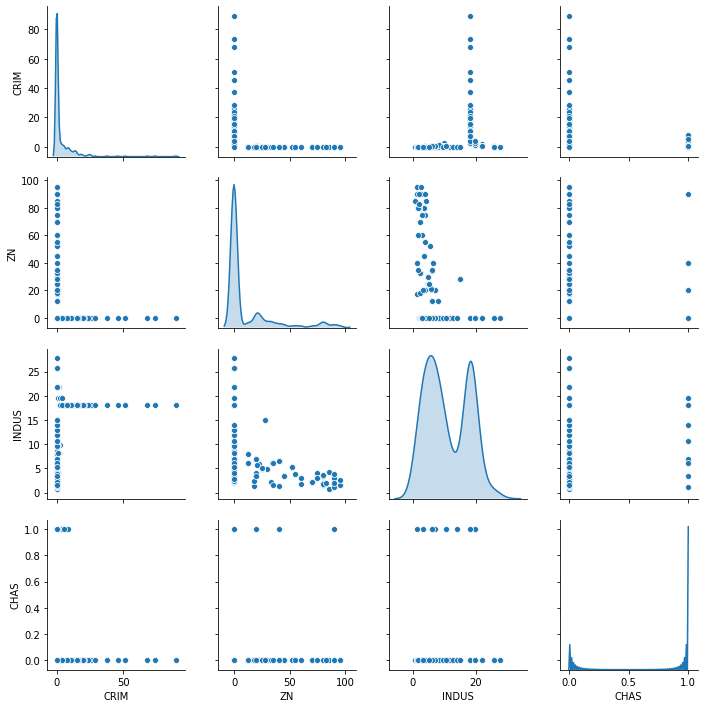

In [134]:
sn.pairplot(train_data[['CRIM', 'ZN', 'INDUS', 'CHAS']], diag_kind = 'kde')

In [135]:
train_stats = train_data.describe()
train_stats.pop('Price')
train_stats.transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,405.0,3.670339,8.977954,0.00632,0.08265,0.26838,3.47428,88.9762
ZN,405.0,11.067901,22.688396,0.00000,0.00000,0.00000,12.50000,95.0000
INDUS,405.0,11.097951,6.699157,0.74000,5.32000,9.69000,18.10000,27.7400
CHAS,405.0,0.069136,0.253999,0.00000,0.00000,0.00000,0.00000,1.0000
NOX,405.0,0.553098,0.115564,0.38500,0.44900,0.53800,0.62400,0.8710
RM,405.0,6.269768,0.690552,3.56100,5.87800,6.19300,6.61900,8.7800
AGE,405.0,68.241975,27.908527,2.90000,45.00000,76.50000,94.10000,100.0000
DIS,405.0,3.834098,2.162173,1.12960,2.07880,3.27210,5.21460,12.1265
RAD,405.0,9.474074,8.618564,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,405.0,405.839506,164.057951,187.00000,284.00000,334.00000,666.00000,711.0000


In [0]:
train_labels = train_data.pop('Price')
test_labels = test_data.pop('Price')

In [0]:
from sklearn.preprocessing import StandardScaler
norm_train_data = StandardScaler().fit_transform(train_data)
norm_test_data = StandardScaler().fit_transform(test_data)

In [137]:
print(len(train_data.keys()))

13


In [0]:
def build_model():
  model = tf.keras.Sequential([
                               tf.keras.layers.Dense(506, activation = 'relu', input_shape = [len(train_data.keys())]),
                               tf.keras.layers.Dense(28, activation = 'relu'),
                               tf.keras.layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.1)
  model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [184]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 506)               7084      
_________________________________________________________________
dense_37 (Dense)             (None, 28)                14196     
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 29        
Total params: 21,309
Trainable params: 21,309
Non-trainable params: 0
_________________________________________________________________


In [185]:
df['Price']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [186]:
example_batch = train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[58.13981 ],
       [75.49532 ],
       [36.133636],
       [75.2601  ],
       [52.4665  ],
       [43.996105],
       [77.59349 ],
       [36.44339 ],
       [43.11726 ],
       [43.247746]], dtype=float32)

In [212]:
EPOCHS = 1000

history = model.fit(train_data, train_labels, epochs = EPOCHS, verbose = 0, validation_split = 0.2, callbacks= [tfdocs.modeling.EpochDots()])



Epoch: 0, loss:78.6339,  mae:6.3701,  mse:78.6339,  val_loss:87.7148,  val_mae:6.6219,  val_mse:87.7148,  
....................................................................................................
Epoch: 100, loss:79.1886,  mae:6.3952,  mse:79.1886,  val_loss:84.2413,  val_mae:6.7287,  val_mse:84.2413,  
....................................................................................................
Epoch: 200, loss:79.9271,  mae:6.5886,  mse:79.9271,  val_loss:87.8045,  val_mae:6.6186,  val_mse:87.8045,  
....................................................................................................
Epoch: 300, loss:78.6467,  mae:6.3435,  mse:78.6467,  val_loss:84.2810,  val_mae:6.7201,  val_mse:84.2810,  
....................................................................................................
Epoch: 400, loss:78.9173,  mae:6.4269,  mse:78.9173,  val_loss:85.4806,  val_mae:6.6485,  val_mse:85.4806,  
....................................................

In [144]:
hist = pd.DataFrame(history.history)
hist['epochs'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epochs
995,79.409487,6.510732,79.409500,86.693616,7.208430,86.693611,995
996,78.993528,6.450393,78.993523,86.724733,7.296528,86.724739,996
997,78.893786,6.482948,78.893791,94.835783,6.930256,94.835777,997
998,79.904227,6.371810,79.904228,90.551408,6.912795,90.551407,998
999,79.216612,6.430041,79.216614,94.786673,6.929292,94.786674,999


In [145]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std = 0.2)
plotter

Text(0, 0.5, 'Price')

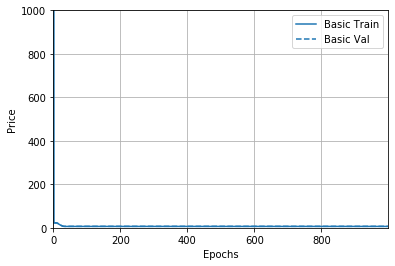

In [190]:
plotter.plot({'Basic' : history}, metric = 'mae')
plt.ylim([0, 1000])
plt.ylabel('Price')

Text(0, 0.5, 'Price')

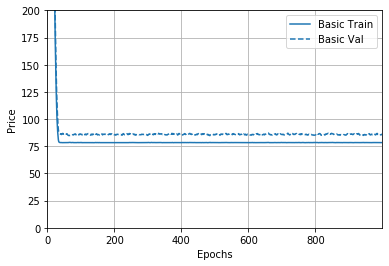

In [197]:
plotter.plot({'Basic' : history}, metric = 'mse')
plt.ylim([0, 200])
plt.ylabel('Price')

In [203]:
model = build_model()

early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 100)
early_history = model.fit(train_data, train_labels, verbose = 0, epochs = 1000, validation_split = 0.2, callbacks= [early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:727631370.3428,  mae:9013.0996,  mse:727631360.0000,  val_loss:34084.9167,  val_mae:170.2114,  val_mse:34084.9180,  
....................................................................................................
Epoch: 100, loss:80.2441,  mae:6.5405,  mse:80.2441,  val_loss:95.7215,  val_mae:6.8289,  val_mse:95.7215,  
....................................................................................................
Epoch: 200, loss:78.8997,  mae:6.3741,  mse:78.8997,  val_loss:83.3976,  val_mae:6.8572,  val_mse:83.3976,  
....................................................................................................
Epoch: 300, loss:79.8347,  mae:6.2856,  mse:79.8347,  val_loss:84.8883,  val_mae:7.3386,  val_mse:84.8883,  
............................................

Text(0, 0.5, 'Price')

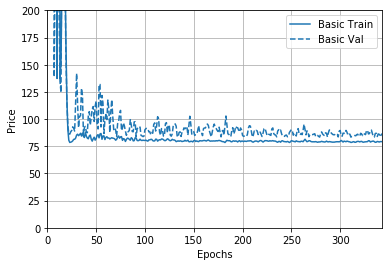

In [204]:
plotter.plot({'Basic' : early_history}, metric = 'mse')
plt.ylim([0, 200])
plt.ylabel('Price')

In [205]:
loss, mae, mse = model.evaluate(train_data, train_labels, verbose = 2)
print(mae)

405/405 - 0s - loss: 80.2726 - mae: 6.3515 - mse: 80.2726
6.3514524


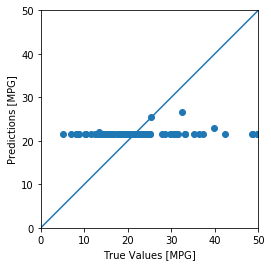

In [206]:
test_predictions = model.predict(test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


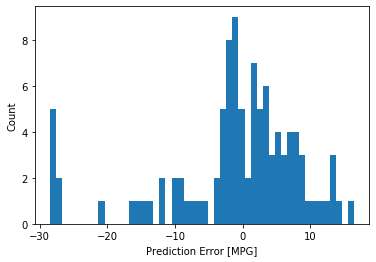

In [207]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")